<a href="https://colab.research.google.com/github/Marco-Fernandes-Filho/Projetos_Data_Science/blob/main/Analise_Criminalidade_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analise da Criminalidade no Estado do Rio de Janeiro**

# Proposta
Neste projeto, analisaremos os dados criminais do estado do Rio de Janeiro de 2014 até 2023.


Através do estudo analítico dos dados, poderemos responder algumas perguntas como:


*   Quais municípios apresentam o maior numero absoluto de crimes cometidos?
*   Quais munícipios apresentam o maior índice de homicídios dolosos por 100 mil habitantes?
*   Do total de carros roubados, quantos são recuperados?
*   Há alguma relação entre a variação da criminalidade e os efeitos advindo da pandemia?
*   Que ano houve o maior número de homicídios?


Ps: Novos questionamentos são sempre bem-vindos para enriquecer nosso estudo e obter mais insights relevantes para a pesquisa.



# Obetenção dos dados

Os dados aqui apresentados foram extraídos do portal [ISPDados](https://http://www.ispdados.rj.gov.br/estatistica.html), página de Dados Abertos do Instituto de Segurança Pública. Nesta página, você poderá acessar as bases de dados de registros criminais e de atividade policial do estado do Rio de Janeiro. As estatísticas aqui divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro.

Utilizaremos de variáveis estatíticas como **roubo de veículos**, **roubo de celulares**, **homicídios dolosos e culposos** e mais.

Caso esteja interessados apenas na parte das perguntas, aconselho pular para a parte de "Respondendo as questões propostas". Daqui até lá apenas faremos o tratamento dos dados que vamos utilizar.

# Importação dos Dados

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [569]:
#colocar no raw do github
#Aqui adicionaremos duas bases de dados, uma com dados brutos dos crimes e outra com o total de crimes por 100 mil habitantes, para enriquecer nosso estudo.
df = pd.read_csv('https://raw.githubusercontent.com/Marco-Fernandes-Filho/Data-base-projects/main/BaseMunicipioMensal%20-%20BaseMunicipioMensal.csv.csv')
df_per100 = pd.read_csv('https://raw.githubusercontent.com/Marco-Fernandes-Filho/Data-base-projects/main/BaseMunicipioTaxaPer100%20-%20BaseMunicipioTaxaMes.csv.csv')

# Análise dos Dados

In [522]:
df.head()

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,11,1,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,Interior,2,0,0,2,0,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,2,0,...,3,2,46,0,0,0,0,0,309,3


In [523]:
# Contaremos com 10580 linhas nesta base de dados com 54 tipos de crime diferente.
# Tamanho do DataFrame
df.shape

(10580, 59)

In [524]:
# Nome de nossas colunas
df.columns.tolist()

['fmun_cod',
 'fmun',
 'ano',
 'mes',
 'regiao',
 'hom_doloso',
 'lesao_corp_morte',
 'latrocinio',
 'cvli',
 'hom_por_interv_policial',
 'letalidade_violenta',
 'tentat_hom',
 'lesao_corp_dolosa',
 'estupro',
 'hom_culposo',
 'lesao_corp_culposa',
 'roubo_transeunte',
 'roubo_celular',
 'roubo_em_coletivo',
 'roubo_rua',
 'roubo_veiculo',
 'roubo_carga',
 'roubo_comercio',
 'roubo_residencia',
 'roubo_banco',
 'roubo_cx_eletronico',
 'roubo_conducao_saque',
 'roubo_apos_saque',
 'roubo_bicicleta',
 'outros_roubos',
 'total_roubos',
 'furto_veiculos',
 'furto_transeunte',
 'furto_coletivo',
 'furto_celular',
 'furto_bicicleta',
 'outros_furtos',
 'total_furtos',
 'sequestro',
 'extorsao',
 'sequestro_relampago',
 'estelionato',
 'apreensao_drogas',
 'posse_drogas',
 'trafico_drogas',
 'apreensao_drogas_sem_autor',
 'recuperacao_veiculos',
 'apf',
 'aaapai',
 'cmp',
 'cmba',
 'ameaca',
 'pessoas_desaparecidas',
 'encontro_cadaver',
 'encontro_ossada',
 'pol_militares_mortos_serv',
 'pol

In [525]:
# Qual tipo de cada uma dessas colunas
df.dtypes

fmun_cod                       int64
fmun                          object
ano                            int64
mes                            int64
regiao                        object
hom_doloso                     int64
lesao_corp_morte               int64
latrocinio                     int64
cvli                           int64
hom_por_interv_policial        int64
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                        int64
hom_culposo                    int64
lesao_corp_culposa             int64
roubo_transeunte               int64
roubo_celular                  int64
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico            int64
roubo_conducao_saque           int64
r

In [526]:
df.describe()

,fmun_cod,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,1.058000e+04,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,...,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000,10580.000000
mean,3.303128e+06,2018.304348,6.347826,3.807278,0.037807,0.127977,3.973062,1.059641,5.032703,4.728261,...,13.893951,1.196786,55.015312,4.596219,0.364934,0.031002,0.018526,0.001985,676.040359,2.965217
std,1.840128e+03,2.773213,3.434119,11.429461,0.255181,0.658028,12.076282,4.803063,16.284080,16.804160,...,56.209859,8.692281,199.859096,20.248366,1.779615,0.242445,0.177251,0.046585,3211.987851,0.183237
min,3.300100e+06,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.301578e+06,2016.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,3.000000
50%,3.303154e+06,2018.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,115.000000,3.000000
75%,3.304632e+06,2021.000000,9.000000,3.000000,0.000000,0.000000,3.000000,0.000000,4.000000,4.000000,...,10.000000,0.000000,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,411.000000,3.000000
max,3.306305e+06,2023.000000,12.000000,146.000000,5.000000,17.000000,165.000000,92.000000,217.000000,271.000000,...,1221.000000,248.000000,3469.000000,286.000000,114.000000,10.000000,5.000000,2.000000,36736.000000,3.000000


# Tratamento da primeira base de dados

In [527]:
# Veremos se há algum dado faltante em nosso Dataframe.
df.isnull().sum()

fmun_cod                      0
fmun                          0
ano                           0
mes                           0
regiao                        0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
cvli                          0
hom_por_interv_policial       0
letalidade_violenta           0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_transeunte              0
roubo_celular                 0
roubo_em_coletivo             0
roubo_rua                     0
roubo_veiculo                 0
roubo_carga                   0
roubo_comercio                0
roubo_residencia              0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_ve

In [528]:
# Como não há dados faltantes, seguiremos para o agrupamento por município e ano, excluindo algumas colunas que ficam defasadas com o agrupamento.
group_year = df.groupby(['fmun','ano']).sum().sort_values(by = 'fmun').drop(['fmun_cod','mes'], axis = 1)

<ipython-input-528-635453b394b0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_year = df.groupby(['fmun','ano']).sum().sort_values(by = 'fmun').drop(['fmun_cod','mes'], axis = 1)


In [529]:
group_year

hom_doloso  lesao_corp_morte  latrocinio  cvli  \
fmun           ano                                                    
Angra dos Reis 2014          75                 0           1    76   
               2015          92                 0           0    92   
               2016          85                 1           1    87   
               2017          87                 0           0    87   
               2018         132                 0           1   133   
...                         ...               ...         ...   ...   
Volta Redonda  2018          72                 1           2    75   
               2019          89                 1           0    90   
               2020          70                 0           1    71   
               2021          69                 0           2    71   
               2023          35                 0           1    36   

                     hom_por_interv_policial  letalidade_violenta  tentat_hom  \
fmun           ano                                                              
Angra dos Reis 2014                        2                   78          82   
               2015                       13                  105         164   
               2016                        7                   94         152   
               2017                       26                  113         163   
               2018                       51                  184         210   
...                                      ...                  ...         ...   
Volta Redonda  2018                        8                   83         116   
               2019                        9                   99         150   
               2020                       14                   85         189   
               2021                        5                   76          85   
               2023                        1                   37          30   

                     lesao_corp_dolosa  estupro  hom_culposo  ...  cmp  cmba  \
fmun           ano                                            ...              
Angra dos Reis 2014                862       92           31  ...  162     4   
               2015                863       83           28  ...  146     6   
               2016                742       56           19  ...  125    14   
               2017                546       60           36  ...  197     5   
               2018                531       73           19  ...  169    13   
...                                ...      ...          ...  ...  ...   ...   
Volta Redonda  2018                860       59           29  ...  232     5   
               2019                886       49           16  ...  251     6   
               2020                690       52           26  ...  216     2   
               2021                856       58           33  ...  201     4   
               2023                453       32           22  ...  107     5   

                     ameaca  pessoas_desaparecidas  encontro_cadaver  \
fmun           ano                                                     
Angra dos Reis 2014     944                     92                 8   
               2015     899                     74                 3   
               2016     654                     77                 9   
               2017     449                     54                 6   
               2018     443                     52                12   
...                     ...                    ...               ...   
Volta Redonda  2018     826                     38                 5   
               2019     870                     95                 3   
               2020     828                     62                 3   
               2021     884                     71                 3   
               2023     486                     42                 0   

                     encontro_ossada  pol_militares_mortos_serv  

# Tratamento da base de dados que contém os números por 100 mil habitantes.

In [530]:
# Primeiramente, veremos se este Dataframe possui dados faltantes.
df_per100.isnull().sum()

fmun_cod                        0
fmun                            0
ano                             0
mes                             0
regiao                          0
hom_doloso                    684
lesao_corp_morte              684
latrocinio                    684
cvli                          684
hom_por_interv_policial       684
letalidade_violenta           684
tentat_hom                    684
lesao_corp_dolosa             684
estupro                       684
hom_culposo                   684
lesao_corp_culposa            684
roubo_transeunte              684
roubo_celular                 684
roubo_em_coletivo             684
roubo_rua                     684
roubo_veiculo                   0
roubo_carga                   684
roubo_comercio                684
roubo_residencia              684
roubo_banco                   684
roubo_cx_eletronico           684
roubo_conducao_saque          684
roubo_apos_saque              684
roubo_bicicleta               684
outros_roubos 

In [531]:
# Criaremos um novo Dataframe onde preencheremos os dados faltantes por 0 e excluiremos algumas colunas desnecessárias para nosso estudo.
# Além disso, por seguinte, iremos agrupar nossos valores por ano.
group_year_per100 = df_per100.fillna(0).drop(['regiao','fmun_cod','mes','fase'], axis = 1)

In [532]:
group_year_per100.head()

,fmun,ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,Laje do Muriaé,2022,"41,27",0,0,"41,27",0,"41,27","13,76",0,...,0,"13,76",0,"27,51",0,0,0,0,0,"316,37"
1,Laje do Muriaé,2021,"41,07",0,0,"41,07",0,"41,07",0,"41,07",...,0,"13,69",0,0,0,0,0,0,0,"205,34"
2,Laje do Muriaé,2020,"27,24",0,0,"27,24",0,"27,24",0,"40,87",...,0,"13,62",0,"81,73",0,0,0,0,0,"395,04"
3,Porto Real,2017,"26,72",0,0,"26,72",0,"26,72",0,"26,72",...,0,"10,69",0,"21,37",0,0,0,0,0,"144,28"
4,Cambuci,2018,"25,92",0,0,"25,92",0,"25,92",0,"25,92",...,"6,48","12,96",0,"25,92",0,0,0,0,0,"272,13"


In [533]:
# Tornaremos a coluna de municípios e a de ano como as coluna de index para fácil agrupamento.
group_year_per100.set_index(['fmun','ano'], inplace=True)

In [534]:
# Como nossos valores estão como "object", quando usamos a função ".groupby()" o pandas acaba não somando essas variáveis por não estarem no formato númerico. Por isso, mudaremos o  tipo destas colunas.
group_year_per100.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10580 entries, ('Laje do Muriaé', 2022) to ('Varre-Sai', 2023)
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hom_doloso                  10580 non-null  object
 1   lesao_corp_morte            10580 non-null  object
 2   latrocinio                  10580 non-null  object
 3   cvli                        10580 non-null  object
 4   hom_por_interv_policial     10580 non-null  object
 5   letalidade_violenta         10580 non-null  object
 6   tentat_hom                  10580 non-null  object
 7   lesao_corp_dolosa           10580 non-null  object
 8   estupro                     10580 non-null  object
 9   hom_culposo                 10580 non-null  object
 10  lesao_corp_culposa          10580 non-null  object
 11  roubo_transeunte            10580 non-null  object
 12  roubo_celular               10580 non-null  object
 13  roubo_em_

In [535]:
# Como os valores possuem ",", os números são tratados como object. Por isso, usaremos a funçao ".replace" para realizar a troca por ".", respeitando o formato dos números no Brasil.
group_year_per100 = group_year_per100.replace({',': '.'}, regex=True)

In [536]:
# Convertendo as colunas para o formato de "float".
group_year_per100 = group_year_per100.astype('float64')
print(df.dtypes)

fmun_cod                       int64
fmun                          object
ano                            int64
mes                            int64
regiao                        object
hom_doloso                     int64
lesao_corp_morte               int64
latrocinio                     int64
cvli                           int64
hom_por_interv_policial        int64
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                        int64
hom_culposo                    int64
lesao_corp_culposa             int64
roubo_transeunte               int64
roubo_celular                  int64
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico            int64
roubo_conducao_saque           int64
r

In [537]:
group_year_per100

hom_doloso  lesao_corp_morte  latrocinio   cvli  \
fmun           ano                                                     
Laje do Muriaé 2022       41.27               0.0         0.0  41.27   
               2021       41.07               0.0         0.0  41.07   
               2020       27.24               0.0         0.0  27.24   
Porto Real     2017       26.72               0.0         0.0  26.72   
Cambuci        2018       25.92               0.0         0.0  25.92   
...                         ...               ...         ...    ...   
Varre-Sai      2023        0.00               0.0         0.0   0.00   
               2023        0.00               0.0         0.0   0.00   
               2023        0.00               0.0         0.0   0.00   
               2023        0.00               0.0         0.0   0.00   
               2023        0.00               0.0         0.0   0.00   

                     hom_por_interv_policial  letalidade_violenta  tentat_hom  \
fmun           ano                                                              
Laje do Muriaé 2022                      0.0                41.27       13.76   
               2021                      0.0                41.07        0.00   
               2020                      0.0                27.24        0.00   
Porto Real     2017                      0.0                26.72        0.00   
Cambuci        2018                      0.0                25.92        0.00   
...                                      ...                  ...         ...   
Varre-Sai      2023                      0.0                 0.00        0.00   
               2023                      0.0                 0.00        0.00   
               2023                      0.0                 0.00        0.00   
               2023                      0.0                 0.00        0.00   
               2023                      0.0                 0.00        0.00   

                     lesao_corp_dolosa  estupro  hom_culposo  ...  aaapai  \
fmun           ano                                            ...           
Laje do Muriaé 2022               0.00      0.0         0.00  ...    0.00   
               2021              41.07      0.0         0.00  ...    0.00   
               2020              40.87      0.0         0.00  ...    0.00   
Porto Real     2017              26.72      0.0         0.00  ...    0.00   
Cambuci        2018              25.92      0.0         6.48  ...    6.48   
...                                ...      ...          ...  ...     ...   
Varre-Sai      2023               0.00      0.0         0.00  ...    0.00   
               2023               0.00      0.0         0.00  ...    0.00   
               2023               0.00      0.0         0.00  ...    0.00   
               2023               0.00      0.0         0.00  ...    0.00   
               2023               0.00      0.0         0.00  ...    0.00   

                       cmp  cmba  ameaca  pessoas_desaparecidas  \
fmun           ano                                                
Laje do Muriaé 2022  13.76   0.0   27.51                    0.0   
               2021  13.69   0.0    0.00                    0.0   
               2020  13.62   0.0   81.73                    0.0   
Porto Real     2017  10.69   0.0   21.37                    0.0   
Cambuci        2018  12.96   0.0   25.92                    0.0   
...                    ...   ...     ...                    ...   
Varre-Sai      2023   0.00   0.0    0.00                    0.0   
               2023   0.00   0.0    0.00                    0.0   
               2023   0.00   0.0    0.00                    0.0   
               2023   0.00   0.0    0.00                    0.0   
               2023   0.00   0.0    0.00                    0.0   

                     encontro_cadaver  encontro_ossada  \
fmun           ano                                       
Laje do Muriaé 2022               0.0   

In [538]:
group_year_per100.sort_values(by = 'fmun')

hom_doloso  lesao_corp_morte  latrocinio  cvli  \
fmun           ano                                                    
Angra dos Reis 2019        2.46               0.0         0.0  2.46   
               2016        4.21               0.0         0.0  4.21   
               2014        2.16               0.0         0.0  2.16   
               2017        4.12               0.0         0.0  4.12   
               2018        7.98               0.0         0.0  7.98   
...                         ...               ...         ...   ...   
Volta Redonda  2016        1.52               0.0         0.0  1.52   
               2014        1.52               0.0         0.0  1.52   
               2015        1.52               0.0         0.0  1.52   
               2021        1.82               0.0         0.0  1.82   
               2017        2.63               0.0         0.0  2.63   

                     hom_por_interv_policial  letalidade_violenta  tentat_hom  \
fmun           ano                                                              
Angra dos Reis 2019                     2.46                 4.92        6.40   
               2016                     0.00                 4.21        6.85   
               2014                     0.00                 2.16        3.79   
               2017                     2.06                 6.17        6.69   
               2018                     3.99                11.98       11.98   
...                                      ...                  ...         ...   
Volta Redonda  2016                     0.00                 1.52        1.52   
               2014                     0.00                 1.52        1.14   
               2015                     0.00                 1.52        0.76   
               2021                     0.00                 1.82        1.09   
               2017                     0.00                 2.63        2.25   

                     lesao_corp_dolosa  estupro  hom_culposo  ...  aaapai  \
fmun           ano                                            ...           
Angra dos Reis 2019              20.17     2.95         0.98  ...    4.43   
               2016              35.28     3.16         0.53  ...    5.79   
               2014              34.61     5.95         0.54  ...    4.33   
               2017              21.09     2.06         1.54  ...    1.03   
               2018              15.47     4.99         0.00  ...    7.48   
...                                ...      ...          ...  ...     ...   
Volta Redonda  2016              24.65     1.52         0.00  ...    5.69   
               2014              28.20     3.05         0.38  ...    6.86   
               2015              30.42     3.04         0.00  ...    4.94   
               2021              22.55     1.82         1.09  ...    6.18   
               2017              20.65     1.13         0.38  ...    8.26   

                       cmp  cmba  ameaca  pessoas_desaparecidas  \
fmun           ano                                                
Angra dos Reis 2019  13.78  0.98   15.75                   2.46   
               2016   3.16  0.53   34.76                   3.16   
               2014   2.70  0.00   56.78                   2.70   
               2017  14.41  0.00   20.58                   2.06   
               2018   6.49  0.50   14.47                   3.49   
...                    ...   ...     ...                    ...   
Volta Redonda  2016   6.83  0.00   30.34                   0.76   
               2014   6.48  0.00   29.34                   1.14   
               2015   7.61  0.00   31.56                   3.04   
               2021   6.18  0.00   28.00                   1.82   
               2017   2.63  0.75   27.78                   1.50   

                     encontro_cadaver  encontro_ossada  \
fmun           ano                                       
Angra dos Reis 2019              0.49              0.

In [539]:
# Finalmente agruparemos os dados por ano de cada município.
group_year_per100 = group_year_per100.groupby(['fmun','ano']).sum()
group_year_per100

hom_doloso  lesao_corp_morte  latrocinio   cvli  \
fmun           ano                                                     
Angra dos Reis 2014       40.58              0.00        0.54  41.12   
               2015       48.88              0.00        0.00  48.88   
               2016       44.43              0.52        0.53  45.48   
               2017       44.72              0.00        0.00  44.72   
               2018       66.09              0.00        0.50  66.60   
...                         ...               ...         ...    ...   
Volta Redonda  2019       32.61              0.37        0.00  32.98   
               2020       25.55              0.00        0.37  25.92   
               2021       25.10              0.00        0.73  25.82   
               2022       23.56              0.36        0.00  23.93   
               2023       12.71              0.00        0.36  13.07   

                     hom_por_interv_policial  letalidade_violenta  tentat_hom  \
fmun           ano                                                              
Angra dos Reis 2014                     1.09                42.21       44.36   
               2015                     6.91                55.77       87.18   
               2016                     3.64                49.12       79.48   
               2017                    13.33                58.03       83.76   
               2018                    25.50                92.09      105.28   
...                                      ...                  ...         ...   
Volta Redonda  2019                     3.31                36.29       54.95   
               2020                     5.12                31.02       69.00   
               2021                     1.81                27.64       30.94   
               2022                     4.35                28.30       23.56   
               2023                     0.36                13.43       10.88   

                     lesao_corp_dolosa  estupro  hom_culposo  ...  aaapai  \
fmun           ano                                            ...           
Angra dos Reis 2014             466.62    49.76        16.76  ...   44.89   
               2015             458.94    44.09        14.84  ...   40.90   
               2016             387.79    29.26         9.93  ...   42.91   
               2017             279.99    30.81        18.47  ...   33.93   
               2018             265.76    36.54         9.47  ...   48.04   
...                                ...      ...          ...  ...     ...   
Volta Redonda  2019             324.57    17.95         5.86  ...   68.49   
               2020             251.87    18.98         9.50  ...   48.19   
               2021             311.42    21.10        11.99  ...   52.01   
               2022             296.67    22.13         9.05  ...   42.43   
               2023             164.36    11.61         7.99  ...   23.22   

                        cmp  cmba  ameaca  pessoas_desaparecidas  \
fmun           ano                                                 
Angra dos Reis 2014   87.67  2.16  510.83                  49.77   
               2015   77.48  3.18  478.25                  39.41   
               2016   65.38  7.32  341.86                  40.23   
               2017  101.17  2.56  230.27                  27.76   
               2018   84.57  6.51  221.59                  26.02   
...                     ...   ...     ...                    ...   
Volta Redonda  2019   91.95  2.20  318.70                  34.78   
               2020   78.84  0.74  302.26                  22.63   
               2021   73.12  1.45  321.60                  25.82   
               2022   81.23  4.70  313.72                  27.55   
               2023   38.83  1.81  176.32                  15.24   

                     encontro_cadaver  encontro_ossada  \
fmun           ano                                       
Angra dos Reis 2014        

# Respondendo as questões propostas:

## Quais municípios apresentam o maior numero absoluto de crimes cometidos?

In [540]:
maior_reg_ocor_index = group_year['registro_ocorrencias'].idxmax()
maior_reg_ocor_values = group_year['registro_ocorrencias'].max()

print("O maior valor absoluto foi no município de/do {}, em {}, contando com {:.0f} registros de ocorrência.".format(maior_reg_ocor_index[0], maior_reg_ocor_index[1], maior_reg_ocor_values))

O maior valor absoluto foi no município de/do Rio de Janeiro, em 2014, contando com 395717 registros de ocorrência.


In [541]:
reg_ocor_top5 = group_year.sort_values(by = 'registro_ocorrencias', ascending = False).head(5)
reg_ocor_top5

hom_doloso  lesao_corp_morte  latrocinio  cvli  \
fmun           ano                                                    
Rio de Janeiro 2014        1237                17          51  1305   
               2022         827                10          38   875   
               2016        1330                28          88  1446   
               2019        1134                19          34  1187   
               2015        1200                11          44  1255   

                     hom_por_interv_policial  letalidade_violenta  tentat_hom  \
fmun           ano                                                              
Rio de Janeiro 2014                      247                 1552        2265   
               2022                      444                 1319         966   
               2016                      463                 1909        2223   
               2019                      726                 1913        1635   
               2015                      307                 1562        2466   

                     lesao_corp_dolosa  estupro  hom_culposo  ...    cmp  \
fmun           ano                                            ...          
Rio de Janeiro 2014              34853     1781          573  ...  10039   
               2022              21444     1911          611  ...   3854   
               2016              27245     1499          502  ...   5050   
               2019              23907     1726          603  ...   8456   
               2015              30341     1610          495  ...   5667   

                     cmba  ameaca  pessoas_desaparecidas  encontro_cadaver  \
fmun           ano                                                           
Rio de Janeiro 2014   457   32621                   2566               180   
               2022   397   20593                   2131               113   
               2016   571   23875                   2710               195   
               2019  2050   20532                   2009               125   
               2015   349   27521                   3066               188   

                     encontro_ossada  pol_militares_mortos_serv  \
fmun           ano                                                
Rio de Janeiro 2014               12                          0   
               2022                7                          9   
               2016               11                         21   
               2019               12                         10   
               2015               19                         15   

                     pol_civis_mortos_serv  registro_ocorrencias  fase  
fmun           ano                                                      
Rio de Janeiro 2014                      0                395717    36  
               2022                      2                392363    36  
               2016                      2                389539    36  
               2019                      0                379989    36  
               2015                      2                376655    36  

[5 rows x 54 columns]

In [542]:
# Como todos os valores são do Rio de Janeiro, tiraremos a coluna de município.
reg_ocor_top5_graf = reg_ocor_top5.reset_index(level='fmun')
reg_ocor_top5_graf = reg_ocor_top5_graf.drop(['fmun','fase'],axis = 1).sort_values(by='ano')

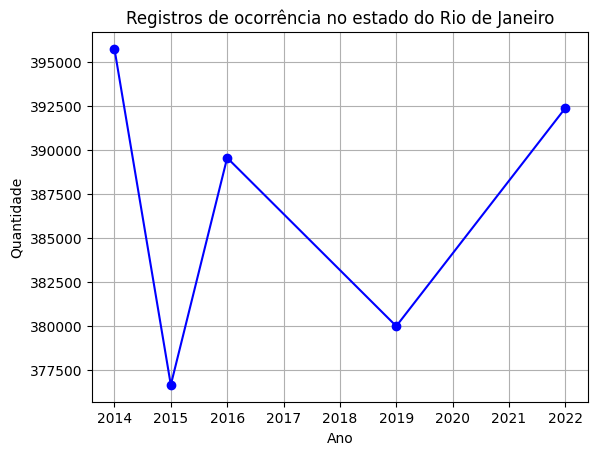

In [543]:
# Criar um gráfico de linha temporal
plt.plot(reg_ocor_top5_graf.index, reg_ocor_top5_graf['registro_ocorrencias'], marker='o', linestyle='-', color='b')

# Definir rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Definir título do gráfico
plt.title('Registros de ocorrência no estado do Rio de Janeiro')

# Mostrar o gráfico
plt.grid(True)
plt.show()

## Que ano houve o maior número de homicídios?

In [544]:
maior_hom_dol_index = group_year_per100['hom_doloso'].idxmax()
maior_hom_dol_values = group_year_per100['hom_doloso'].max()

print("O maior valor foi em {}, em {}, contando com {:.0f} homicídios dolosos".format(maior_hom_dol_index[0], maior_hom_dol_index[1], maior_hom_dol_values))

O maior valor foi em Queimados, em 2016, contando com 126 homicídios dolosos


## Que município, em que ano, apresentou o maior número de registros de ocorrência?

In [545]:
maior_reg_ocor_per100_index = group_year_per100['registro_ocorrencias'].idxmax()
maior_reg_ocor_per100_values = group_year_per100['registro_ocorrencias'].max()

print("O maior valor foi em {}, em {}, contando com {:.0f} registros de ocorrência".format(maior_reg_ocor_per100_index [0], maior_reg_ocor_per100_index [1], maior_reg_ocor_per100_values))

O maior valor foi em Itatiaia, em 2014, contando com 10115 registros de ocorrência


In [546]:
maior_reg_ocor_mes = df[(df['ano'] == maior_reg_ocor_per100_index [1]) & (df['fmun'] == maior_reg_ocor_per100_index [0])].sort_values(by='registro_ocorrencias', ascending=False).head(1)

In [547]:
# Talvez fosse legal colocar alguma notícia evidenciando a alta no reveillon deste ano em Búzios
print('Esse alta ocorreu no mês {} de {}.'.format(maior_reg_ocor_mes['mes'].values, maior_reg_ocor_per100_index [1]))

Esse alta ocorreu no mês [9] de 2014.


In [548]:
group_year_per100.sort_values(by = 'registro_ocorrencias', ascending = False).head(10)

hom_doloso  lesao_corp_morte  latrocinio   cvli  \
fmun               ano                                                     
Itatiaia           2014       13.33              0.00        0.00  13.33   
Armação dos Búzios 2015       35.58              0.00        0.00  35.58   
                   2014       52.59              3.31        0.00  55.89   
                   2016       40.92              0.00        3.18  44.10   
Miguel Pereira     2016       36.21              0.00        4.02  40.23   
Armação dos Búzios 2022       42.21              0.00        0.00  42.21   
Itatiaia           2015       19.83              0.00        3.30  23.13   
Cardoso Moreira    2015       15.92              0.00        0.00  15.92   
Armação dos Búzios 2019       20.68              2.93        0.00  23.61   
Cardoso Moreira    2016       31.91              0.00        0.00  31.91   

                         hom_por_interv_policial  letalidade_violenta  \
fmun               ano                                                  
Itatiaia           2014                     0.00                13.33   
Armação dos Búzios 2015                     3.21                38.80   
                   2014                     0.00                55.89   
                   2016                     3.13                47.24   
Miguel Pereira     2016                     0.00                40.23   
Armação dos Búzios 2022                     8.45                50.66   
Itatiaia           2015                     0.00                23.13   
Cardoso Moreira    2015                     0.00                15.92   
Armação dos Búzios 2019                     8.83                32.44   
Cardoso Moreira    2016                     0.00                31.91   

                         tentat_hom  lesao_corp_dolosa  estupro  hom_culposo  \
fmun               ano                                                         
Itatiaia           2014       50.07             727.15    43.44        30.00   
Armação dos Búzios 2015       41.87             809.17    48.31        12.88   
                   2014       72.16             961.57    62.61        16.36   
                   2016       82.20             569.18    40.91         9.53   
Miguel Pereira     2016       28.15            1070.22   112.64        48.28   
Armação dos Búzios 2022       47.90             697.29    89.94        36.52   
Itatiaia           2015       95.92             717.65    23.17         3.31   
Cardoso Moreira    2015        7.96            1066.94    63.72        47.77   
Armação dos Búzios 2019       68.01             683.09    76.75        11.86   
Cardoso Moreira    2016       79.78            1036.77   119.65        23.92   

                         ...  aaapai     cmp   cmba   ameaca  \
fmun               ano   ...                                   
Itatiaia           2014  ...   90.04  163.51  20.00   943.87   
Armação dos Búzios 2015  ...  109.43  277.07  16.07   909.00   
                   2014  ...  151.71  364.67  49.31  1159.05   
                   2016  ...   63.44  249.75  22.24   629.42   
Miguel Pereira     2016  ...    0.00  430.54   0.00  1130.60   
Armação dos Búzios 2022  ...   36.61   90.04   2.80   849.17   
Itatiaia           2015  ...   62.83  129.00  36.34   972.33   
Cardoso Moreira    2015  ...   23.89  270.78   7.96  1393.51   
Armação dos Búzios 2019  ...  103.47  189.38  11.83   777.01   
Cardoso Moreira    2016  ...   15.95  111.67   7.98  1531.40   

                         pessoas_desaparecidas  encontro_cadaver  \
fmun               ano                                             
Itatiaia           2014                  29.98              6.66   
Armação dos Búzios 2015                  25.70              9.63   
                   2014                  39.44              3.26   
                   2016                  56.97              6.30   
Miguel Pereira     2016                  40.23             16.08   
Armação dos Búzios 2022      

## Do total de carros roubados, quantos são recuperados?


In [549]:
sum_roubo_veiculo = df.roubo_veiculo.sum()
sum_furto_veiculos = df.furto_veiculos.sum()
sum_recuperacao_veiculos = df.recuperacao_veiculos.sum()

print("Dos {} carros roubados ou furtados no estado do Rio de Janeiro, {} são recuperados.".format(sum_roubo_veiculo+sum_furto_veiculos, sum_recuperacao_veiculos))

Dos 492297 carros roubados ou furtados no estado do Rio de Janeiro, 230250 são recuperados.


In [550]:
porc_roub_recup = (sum_recuperacao_veiculos / (sum_roubo_veiculo + sum_furto_veiculos))*100

print("{:.2f}% dos carros são recuperados.".format(porc_roub_recup ))

46.77% dos carros são recuperados.


## Há alguma relação entre a variância nos crimes relacionados com as droga e o homicídio?

<ipython-input-551-e2fabda6f946>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  sum_per_year = df.set_index('ano').stack().sum(level=[0,1]).unstack()


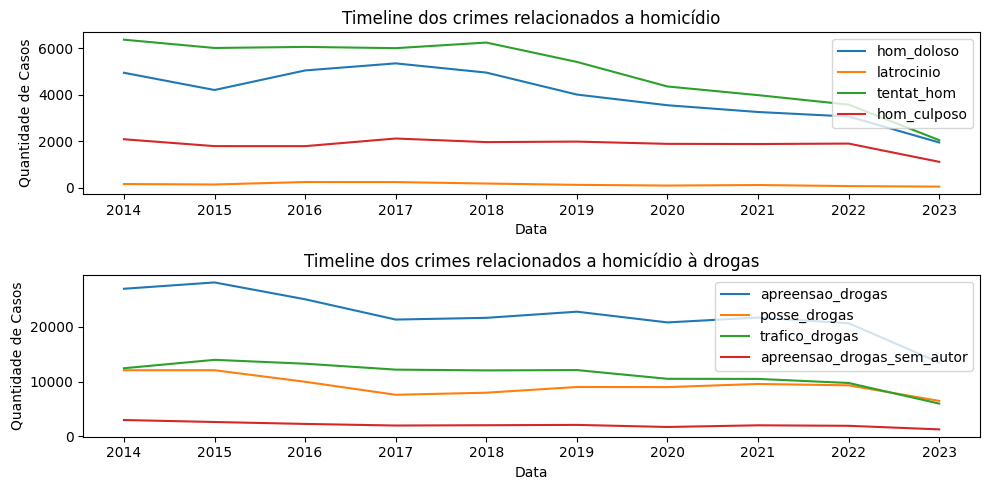

In [551]:
# Selecionanando as colunas que iremos usar
columns_total = ['hom_doloso','latrocinio','tentat_hom','hom_culposo', 'ameaca','apreensao_drogas','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor']

# Agrupando a quantidade de crimes por ano
sum_per_year = df.set_index('ano').stack().sum(level=[0,1]).unstack()

# Aplicando as colunas desejadas
sum_per_year = sum_per_year[columns_total]

# plotar gráficos

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
columns_hom = ['hom_doloso','latrocinio','tentat_hom','hom_culposo']
columns_drogas = ['apreensao_drogas','posse_drogas','trafico_drogas','apreensao_drogas_sem_autor']

sum_per_year[columns_hom].plot(ax=ax1)
ax1.set_title("Timeline dos crimes relacionados a homicídio")
ax1.set_ylabel("Quantidade de Casos")
ax1.set_xlabel("Data")
ax1.set_xticks(range(2014, 2024, 1))

sum_per_year[columns_drogas].plot(ax=ax2)
ax2.set_title("Timeline dos crimes relacionados a homicídio à drogas")
ax2.set_ylabel("Quantidade de Casos")
ax2.set_xlabel("Data")
ax2.set_xticks(range(2014, 2024, 1))

plt.tight_layout()


 Aparentemente não, uma vez que temos valores bem constantes pelos crimes relacionados às drogas, enquanto que podemos ver uma variação brusca nos crimes relacionados a homicídio no período pós-pandemia. Contudo, podemos nos alertar para mais alguns detalhes:

1.   Apesar do número absoluto de homicídios ter diminuido, tal diferença se da especialemnte para homicídios dolosos e tentativas de homicídio que sofreram uma queda após 2018.
2.   Como nosso dataframe não engloba o ano de 2023 inteiro, tal ano pode não representar medidas de estudo adequadaS.
3.   Podemos ver que após 2015 houve também uma queda no número de apreensão por drogas.



## Há alguma relação entre a variação da criminalidade e os efeitos advindo da pandemia?

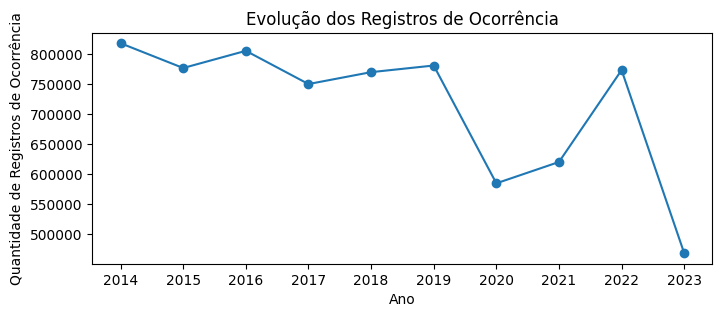

In [552]:
# plotar gráfico do nível de criminalidade por ano
# homicídio doloso
anos_ro = df.groupby("ano").registro_ocorrencias.sum().keys()
sum_registro_ocorrencias = df.groupby("ano").registro_ocorrencias.sum().values
plt.figure(figsize=(8,3))
plt.xticks(range(2014, 2024, 1),fontsize=10)
plt.plot(anos_ro, sum_registro_ocorrencias, marker='o')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Registros de Ocorrência')
plt.title("Evolução dos Registros de Ocorrência", fontsize=12)
plt.show()

Neste gráfico, podemos ver uma diminuição brusca do número de registros de ocorrência no ano de 2020, quando foi estaurado o lockdown. Esta diferença pode ser dar pela diminuição de pessoas na rua influenciando o número de crimes como **furto de celular**, **assalto de carro**, **posse de drogas**, entre outros.

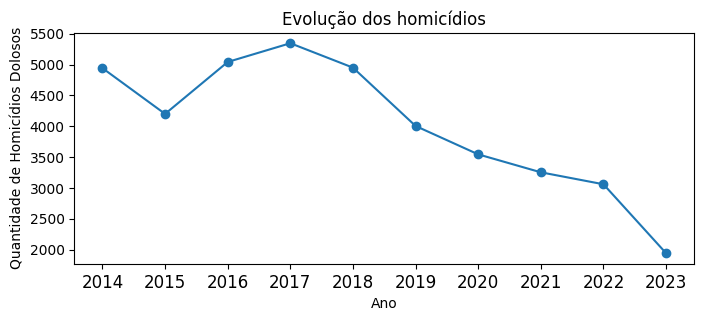

In [553]:
# plotar gráfico do nível de crimnalidade por ano
# registro de ocorrencia
anos = df.groupby("ano").hom_doloso.sum().keys()
sum_hom_doloso = df.groupby("ano").hom_doloso.sum().values
plt.figure(figsize=(8,3))
plt.xticks(range(2014, 2024, 1),fontsize=12)
plt.plot(anos, sum_hom_doloso, marker='o')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Homicídios Dolosos')
plt.title("Evolução dos homicídios", fontsize=12)
plt.show()

Já neste outro gráfico podemos ver uma diminuição que vem desde o ano de 2017, o que pode não ser só justificavel pela pandemia, apesar da possibilidade de o mesmo ter intensificado a queda.

## Que região do estado apresenta o maior índice criminal por 100 mil habitantes e absoluto.

In [554]:
# Agruparemos nosso dataframe por região para melhor análise.
group_regiao = df.groupby(['regiao']).sum().drop(['fmun_cod','ano', 'mes', 'fase'], axis = 1)

<ipython-input-554-15274fca0438>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_regiao = df.groupby(['regiao']).sum().drop(['fmun_cod','ano', 'mes', 'fase'], axis = 1)


In [555]:
# Localizaremos o municíipio e o valor do maior índice crimial no nosso data base.
maior_reg_ocor_regiao_index = group_regiao['registro_ocorrencias'].idxmax()
maior_reg_ocor_regiao_values = group_regiao['registro_ocorrencias'].max()

In [556]:
print(f"A região que mais apresentou registros de ocorrência foi na/no {maior_reg_ocor_regiao_index}, com {maior_reg_ocor_regiao_values} registros documentados.")

A região que mais apresentou registros de ocorrência foi na/no Capital, com 3500708 registros documentados.


In [557]:
group_regiao['registro_ocorrencias']

regiao
Baixada Fluminense    1394208
Capital               3500708
Grande Niterói         697365
Interior              1560226
Name: registro_ocorrencias, dtype: int64

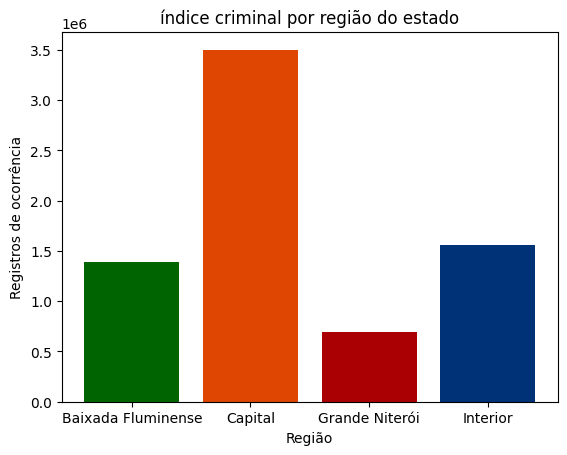

In [558]:
# Criando o gráfico
colors=['darkgreen', '#DF4601', '#AB0003', '#003278']
plt.bar(group_regiao.index, group_regiao['registro_ocorrencias'], color = colors)

# Adicionar rótulos aos eixos e um título ao gráfico
plt.xlabel('Região')
plt.ylabel('Registros de ocorrência')
plt.title('índice criminal por região do estado')

# Exibir o gráfico
plt.show()

## Quais munícipios apresentam o maior índice de homicídios dolosos por 100 mil habitantes?

In [559]:
group_fmun_humdoloso_graf = group_year_per100.reset_index(level='ano').drop(['ano'], axis = 1).groupby(['fmun']).sum()

In [560]:
group_fmun_humdoloso_graf = group_fmun_humdoloso_graf.sort_values('hom_doloso', ascending = False).head(5)

In [561]:
group_fmun_humdoloso_graf['hom_doloso']

fmun
Paraty                         593.17
Queimados                      561.14
São Francisco de Itabapoana    550.93
Japeri                         457.96
Cabo Frio                      457.38
Name: hom_doloso, dtype: float64

In [562]:
print('''O município que mais apresentou homicídios dolosos por 100 mil habitantes foi {}, com {}, seguido por {}, com {}.'''
.format(group_fmun_humdoloso_graf['hom_doloso'].index[0],group_fmun_humdoloso_graf['hom_doloso'].values[0],
group_fmun_humdoloso_graf['hom_doloso'].index[1], group_fmun_humdoloso_graf['hom_doloso'].values[1]))

O município que mais apresentou homicídios dolosos por 100 mil habitantes foi Paraty, com 593.17, seguido por Queimados, com 561.14.


# Conclusão
Respondemos com este estudo algumas perguntas pré-estabelecidas como a porcentagem de carros recuperados após furto ou roubo e os municípios com maior número de registros de ocorrência. Contudo, muitas outras perguntas podem ser respondidas extraindo dados diferentes do portal e manipulando de outras formas a base de dados que temos. Novas ideias são sempre bem-vindas de outros insights que podemos ter.

Redes sociais:

https://www.linkedin.com/in/marco-fernandes-2685461a3/